## Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

## Load Dataset

In [2]:
dataset_path = 'dataset/magic/magic.csv'

In [3]:
columns_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl' ,'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [4]:
# Read in a CSV file and store the contents in a pandas data frame
df = pd.read_csv(dataset_path, header=None, names=columns_names)

## EDA

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [7]:
df.shape

(19020, 11)

### Target classes

In [8]:
# Target classes
df['class'].unique()

array(['g', 'h'], dtype=object)

In [9]:
# Converting the target classes to binary
df['class'] = df['class'].map({'g': 1, 'h': 0})

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [11]:
df['class'].unique()

array([1, 0])

### Plots

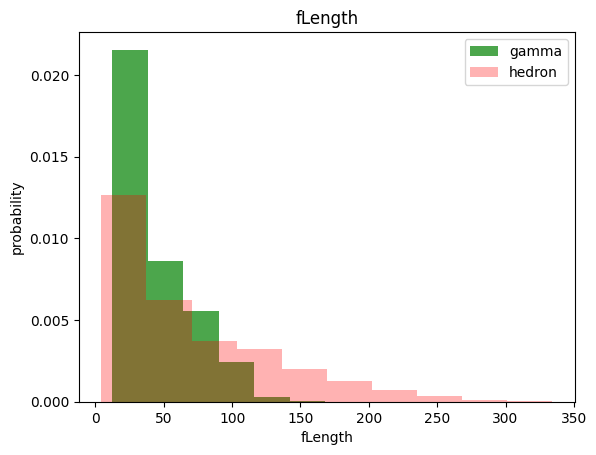

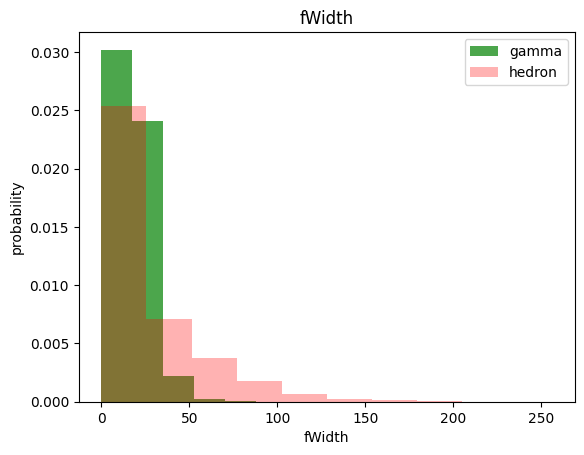

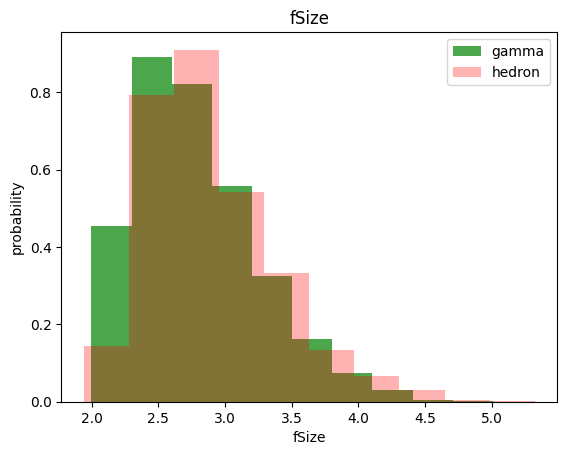

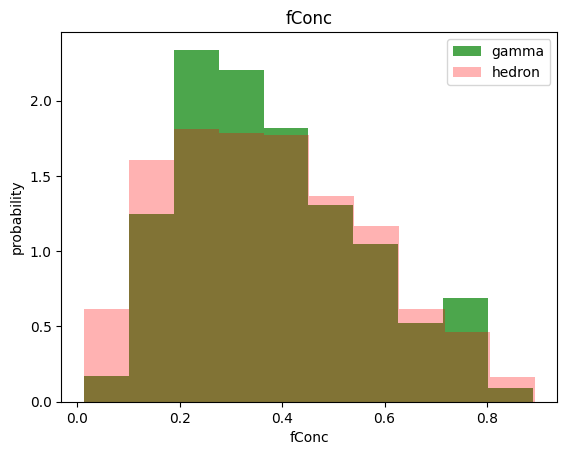

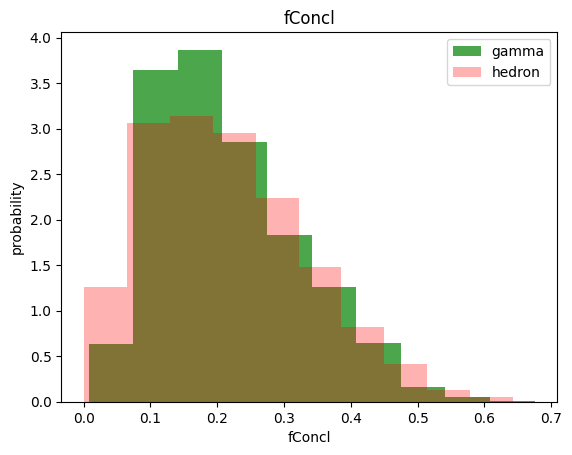

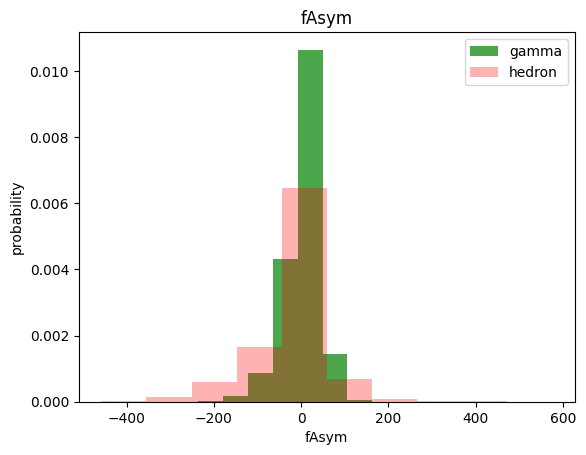

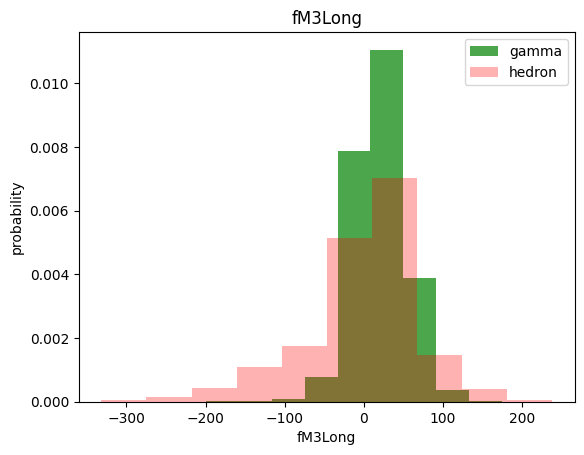

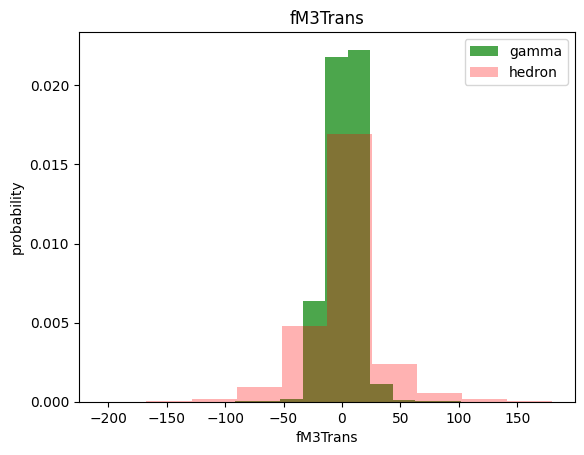

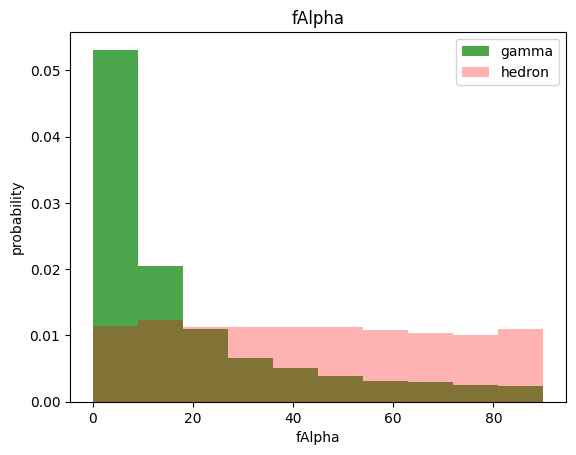

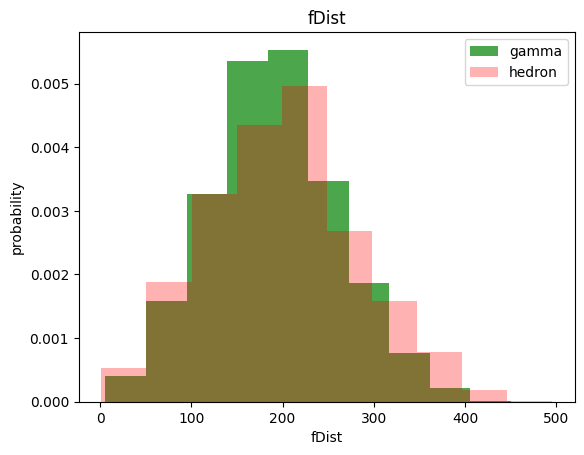

In [12]:
for label in columns_names[:-1]:
    plt.hist(df[df['class']==1][label], color='green', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hedron', alpha=0.3, density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validate and test datasets

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

/home/vx/allenv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Preprocessing

In [14]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Scale dataset

In [15]:
def scale_oversample_dataset(data, oversample=False):
    if isinstance(data, np.ndarray):
        X = data[:, :-1]
        y = data[:, -1]
    elif isinstance(data, pd.DataFrame):
        X = data[data.columns[:-1]].values # input
        y = data[data.columns[-1]].values # output
    else:
        raise ValueError("Input data must be a Pandas DataFrame or a NumPy array.")
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    # join columns
    scaled_data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return scaled_data, X, y

### Oversampling

In [16]:
print(f'Gamma train data count: {len(train[train['class']==1])}')
print(f'Hedron train data count: {len(train[train['class']==0])}')

Gamma train data count: 7391
Hedron train data count: 4021


In [17]:
# Oversample the training data
train, X_train, y_train = scale_oversample_dataset(train, oversample=True)

In [18]:
print(f'Gamma train data count: {len(train[y_train==1])}')
print(f'Hedron train data count: {len(train[y_train==0])}')

Gamma train data count: 7391
Hedron train data count: 7391


In [19]:
train, X_train, y_train = scale_oversample_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_oversample_dataset(valid, oversample=False)
test, X_test, y_test = scale_oversample_dataset(test, oversample=False)

## Models

1. KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Train the model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
# Validate the model
y_pred = knn_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1346
           1       0.84      0.87      0.85      2458

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### 2. 